<a href="https://colab.research.google.com/github/UmbuMFA/Quiz1_MachineLearning/blob/main/js02_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 1

NIM: 2241727033
Nama:Umbu Michael Fernando Andumanang
Kelas: TI 4J

## Soal

Media Pengerjaan: Google Collab atau Jupyter Notebook

Soal: Buat visualisasi dengan mengkuti aturan berikut.

1. Pilih dataset, pastikan dataset yang digunakan merupakan data yang telah kalian pahami.

2. Pastikan variabel yang digunakan untuk visualisasi (hubungan antar variabel jelas)

3. Buat visualisasi yang sesuai

### Persiapan Data

In [ ]:
# import package
import numpy as np
import pandas as pd

In [ ]:
# baca data
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['data_gaji.csv']))
data.head()

Saving data_gaji.csv to data_gaji.csv


,tahun_berkerja,gaji
0,1,3900000
1,2,4600000
2,3,3700000
3,4,4300000
4,5,3900000


In [ ]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tahun_berkerja  20 non-null     int64
 1   gaji            20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


,tahun_berkerja,gaji
count,20.00000,2.000000e+01
mean,10.50000,5.885000e+06
std,5.91608,1.478005e+06
min,1.00000,3.700000e+06
25%,5.75000,5.200000e+06
50%,10.50000,5.700000e+06
75%,15.25000,6.450000e+06
max,20.00000,9.300000e+06


### Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


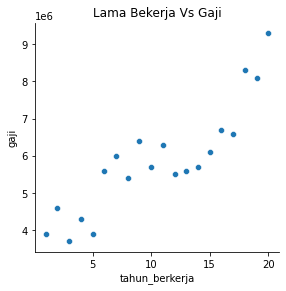

In [ ]:
# operasi visualisasi
sns.pairplot(data, x_vars=['tahun_berkerja'], 
             y_vars='gaji', size=4, aspect=1, kind='scatter')
plt.title('Lama Bekerja Vs Gaji')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

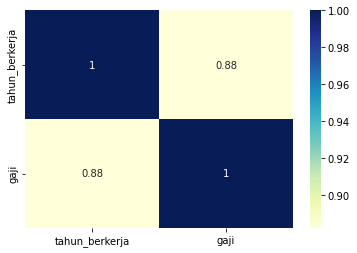

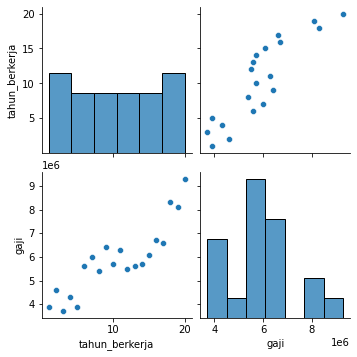

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()
sns.pairplot(data)

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [ ]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['tahun_berkerja']
y = data['gaji']

In [ ]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [ ]:
# hasil training dtaset
X_train
y_train

16    6600000
1     4600000
9     5700000
14    6100000
12    5600000
5     5600000
2     3700000
4     3900000
10    6300000
0     3900000
15    6700000
7     5400000
3     4300000
8     6400000
Name: gaji, dtype: int64

In [ ]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const             3.846190e+06
tahun_berkerja    1.746112e+05
dtype: float64

In [ ]:
# analisis statistika dari garis regresi
lr.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gaji   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     37.43
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           5.19e-05
Time:                        07:01:41   Log-Likelihood:                -203.76
No. Observations:                  14   AIC:                             411.5
Df Residuals:                      12   BIC:                             412.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.846e+06   2.85e+05     13.495      0.000    3.23e+06    4.47e+06
tahun_berkerja  1.746e+05   2.85e+04      6.118      0.000    1.12e+05    2.37e+05
==============================================================================
Omnibus:                        0.405   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.515
Skew:                           0.253   Prob(JB):                        0.773
Kurtosis:                       2.208   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

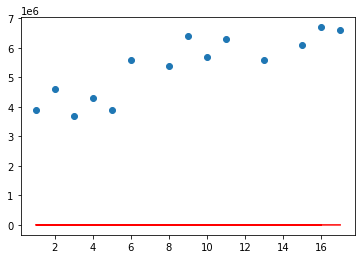

In [ ]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 3.8461  + 1.7461*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [ ]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


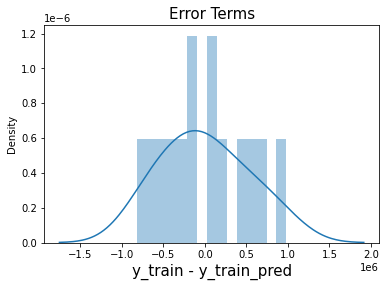

In [ ]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

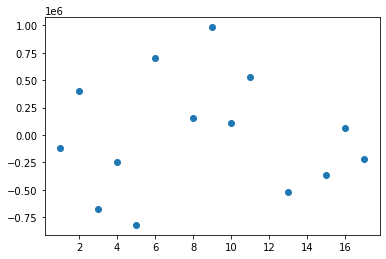

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


17    6.989191e+06
19    7.338414e+06
11    5.941524e+06
18    7.163802e+06
13    6.290747e+06
dtype: float64

In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.3955996358809175

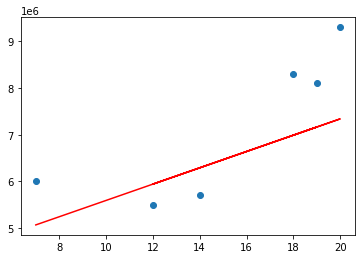

In [ ]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()